In [1]:
from neurosynth.base.dataset import Dataset
from neurosynth.analysis import decode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#python 2.7 required

In [2]:
def getOrder(d, thr):
    dh = []
    zero_index = None
    for i in range(0,len(d)):
        di = d[i]
        if np.sum(di) == 0:  # All weights are zero
            zero_index = i  # Remember the index of this row
        else:
            dh.append(np.average(np.array(range(0,len(d[i]))) + 1, weights=di))
    heatmapOrder = np.argsort(dh)
    if zero_index is not None:
        # If there was a zero row, place it first in the border
        heatmapOrder = np.insert(heatmapOrder, 0, zero_index)
    return heatmapOrder


In [3]:
def getOrder(d, thr):
    dh = []
    zero_indices = []
    for i in range(len(d)):
        di = d[i]
        if np.sum(di) == 0:  # All weights are zero
            zero_indices.append(i)  # Remember the index of this row
        else:
            dh.append(np.average(np.array(range(len(di))) + 1, weights=di))
    heatmapOrder = np.argsort(dh).tolist()  # Sort the indices of non-zero rows
    if zero_indices:  # If there are zero rows
        # Place the indices of zero rows at the beginning in the order they appeared
        heatmapOrder = zero_indices + heatmapOrder
    return heatmapOrder


In [4]:
# Create a new Dataset instance
dataset = Dataset('/Users/gcooper/Downloads/GSP_StructuralDecouplingIndex-master/Code_NCOMMS/Python/database_feb_2015/database.txt')
# Add some features
dataset.add_features('/Users/gcooper/Downloads/GSP_StructuralDecouplingIndex-master/Code_NCOMMS/Python/database_feb_2015/features.txt')
dataset.save('/Users/gcooper/Downloads/GSP_StructuralDecouplingIndex-master/Code_NCOMMS/Python/database_feb_2015/dataset.pkl')


In [5]:
print(pd. __version__)

0.24.2


In [6]:
# Analysis with 24 terms:
features = pd.read_csv('/Users/gcooper/Downloads/GSP_StructuralDecouplingIndex-master/Code_NCOMMS/Python/database_feb_2015/v3-topics-50.txt', sep='\t', index_col=0)
topics_to_keep = [ 1, 4,  6, 14, 
                  18, 19, 23, 25, 
                  20, 21, 27, 29,
                  30, 31, 33, 35, 
                  36, 38, 37, 41, 
                  44, 45, 48, 49]
labels = ['face/affective processing', ' verbal semantics', 'cued attention', 'working memory', 
          'autobiographical memory', 'reading', 'inhibition', 'motor', 
          'visual perception', 'numerical cognition', 'reward-based decision making', 'visual attention', 
          'multisensory processing', 'visuospatial','eye movements', 'action',
          'auditory processing', 'pain', 'language', 'declarative memory', 
          'visual semantics', 'emotion', 'cognitive control', 'social cognition']
features = features.iloc[:, topics_to_keep]
features.columns = labels
dataset.add_features(features, append=False)

# removed_as_noise = [0,5,9,12,17,40] # from 30 terms that were above threshold
# labels_noise = ['resting-state', 'dementia', 'development', 'misc', 'task timing', 'lateralization']

In [9]:
thr_paths = [
    '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-0-5.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-10-15.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-15-20.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-20-25.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-25-30.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-30-35.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-35-40.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-40-45.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-45-50.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-5-10.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-50-55.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-55-60.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-60-65.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-65-70.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-70-75.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-75-80.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-80-85.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-85-90.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-90-95.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_x_thr-95-100.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-0-5.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-10-15.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-15-20.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-20-25.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-25-30.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-30-35.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-35-40.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-40-45.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-45-50.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-5-10.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-50-55.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-55-60.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-60-65.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-65-70.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-70-75.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-75-80.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-80-85.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-85-90.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-90-95.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_y_thr-95-100.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-0-5.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-10-15.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-15-20.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-20-25.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-25-30.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-30-35.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-35-40.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-40-45.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-45-50.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-5-10.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-50-55.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-55-60.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-60-65.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-65-70.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-70-75.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-75-80.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-80-85.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-85-90.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-90-95.nii.gz',
'/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/all_percs_all_embs/PCA_z_thr-95-100.nii.gz' ]


In [7]:
new_order = ['visual perception', 'multisensory processing', 'reading', 'motor', 'eye movements', 'numerical cognition',
             'auditory processing', 'visual attention', 'pain', 'action', 'visuospatial', 'cued attention', 
             'working memory', 'inhibition', 'language', 'cognitive control', 'verbal semantics', 
             'declarative memory', 'autobiographical memory', 'social cognition', 'visual semantics', 
             'face/affective processing', 'emotion', 'reward-based decision making']

heatmapOrder=new_order

In [8]:
labels = ['face/affective processing', 'verbal semantics', 'cued attention', 'working memory', 
          'autobiographical memory', 'reading', 'inhibition', 'motor', 
          'visual perception', 'numerical cognition', 'reward-based decision making', 'visual attention', 
          'multisensory processing', 'visuospatial','eye movements', 'action',
          'auditory processing', 'pain', 'language', 'declarative memory', 
          'visual semantics', 'emotion', 'cognitive control', 'social cognition']

new_order = ['visual perception', 'multisensory processing', 'reading', 'motor', 'eye movements', 'numerical cognition',
             'auditory processing', 'visual attention', 'pain', 'action', 'visuospatial', 'cued attention', 
             'working memory', 'inhibition', 'language', 'cognitive control', 'verbal semantics', 
             'declarative memory', 'autobiographical memory', 'social cognition', 'visual semantics', 
             'face/affective processing', 'emotion', 'reward-based decision making']

topics_to_keep = (range(24))

# Create a dictionary where the keys are the labels and the values are the corresponding numbers
label_dict = dict(zip(labels, topics_to_keep))

# Use the dictionary to map the labels in new_order back to their original numbers
new_order_numbers = [label_dict[label] for label in new_order]

print(new_order_numbers)




[8, 12, 5, 7, 14, 9, 16, 11, 17, 15, 13, 2, 3, 6, 18, 22, 1, 19, 4, 23, 20, 0, 21, 10]


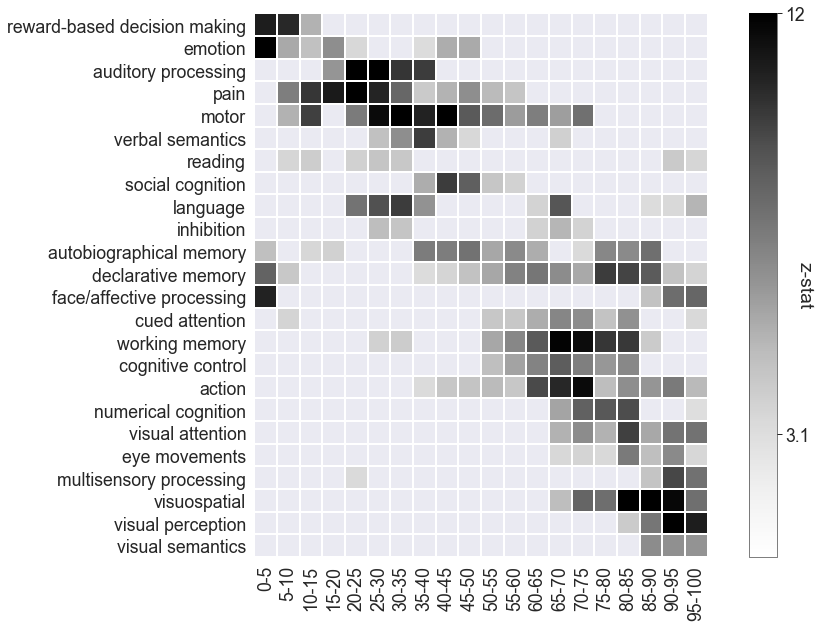

In [11]:
# Gradient 1

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
    

data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_x/resamp_PCA_x_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_x/PCA_x_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr,vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

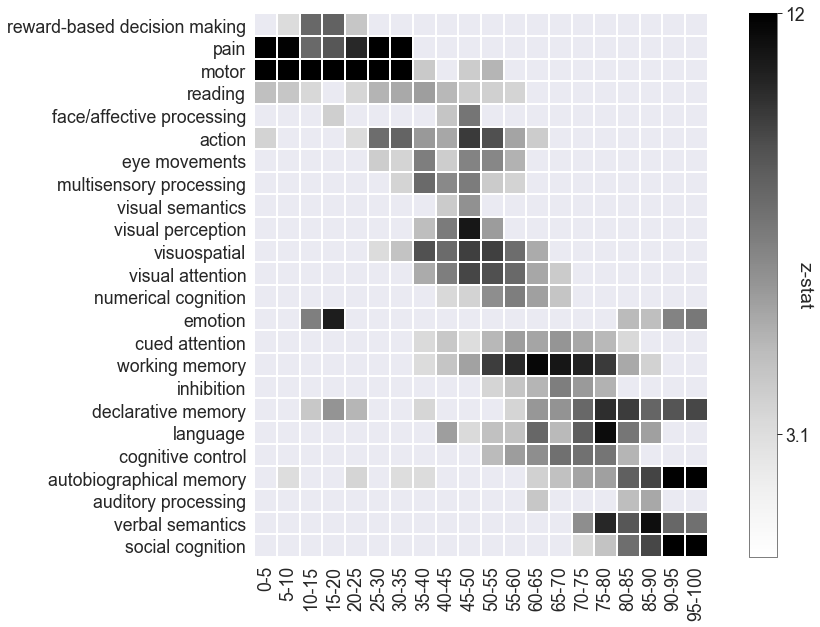

In [12]:
# Gradient 1

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
    

data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_y/resamp_PCA_y_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_y/PCA_y_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr,vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

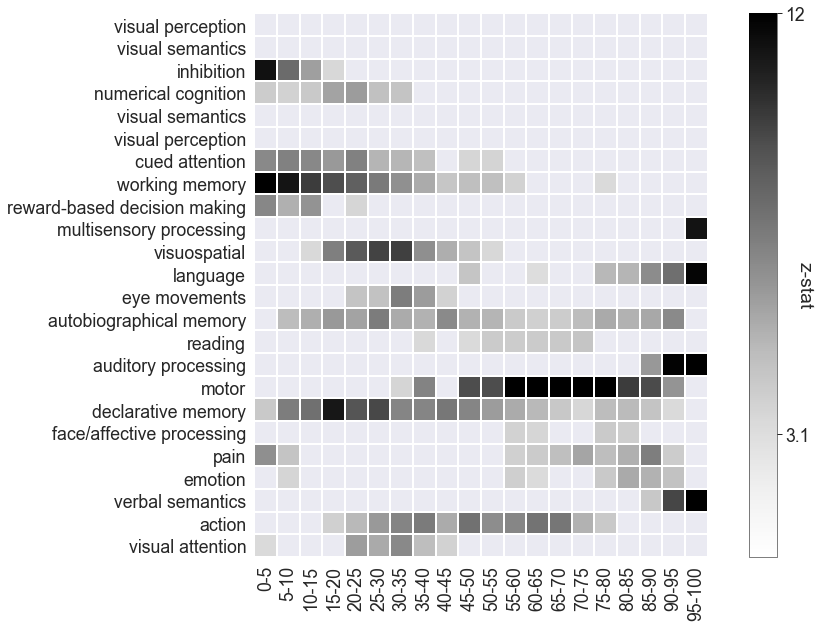

In [11]:
# Gradient 3

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_z/resamp_PCA_z_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_z/PCA_z_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

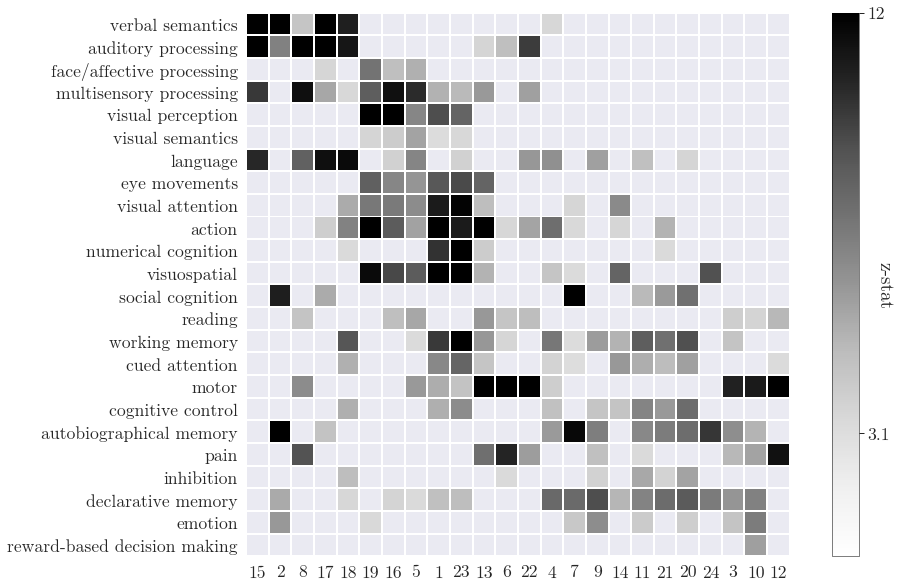

In [12]:
# clusters

import matplotlib.font_manager as fm
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'
# Register the font
custom_font = fm.FontProperties(fname=font_path)
# Set font to custom_font
plt.rcParams['font.family'] = custom_font.get_name()
plt.rcParams['font.size'] = 14  # Change the number to the size you want

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/apc_post_fuckup/grp_avgs_download/outputting_regions/final/resamp-outputting_regions_cluster-%02d.nii.gz' % (i)) 
                       for i in xrange(1,25)],save='/Users/gcooper/Desktop/Delay_attempt_9000/apc_post_fuckup/grp_avgs_download/outputting_regions/final/outputting_regions_clusters_decoding_results.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
#data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_z/resamp_PCA_z_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
 #                      for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/dimensions/means/thr_z/PCA_z_thr-decoding_results.txt')

df = []
df = data.copy()


# Rename the columns as numbers 1 to 24
df.columns = range(1, 25)
df[df<thr] = 0 

# Define label groupings
groupings_order = [15, 2, 8, 17, 18, 19, 16, 5, 1, 23, 13, 6, 22, 4, 7, 9, 14, 11, 21, 20, 24, 3, 10, 12]


df_ordered = pd.DataFrame()

for i in groupings_order:
    df_ordered[i] = df[i]
    
df[df<thr] = 0 

heatmapOrder = getOrder(np.array(df_ordered), thr)

#sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df_ordered.reindex(df_ordered.index[heatmapOrder])
# cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
#             ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)

cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

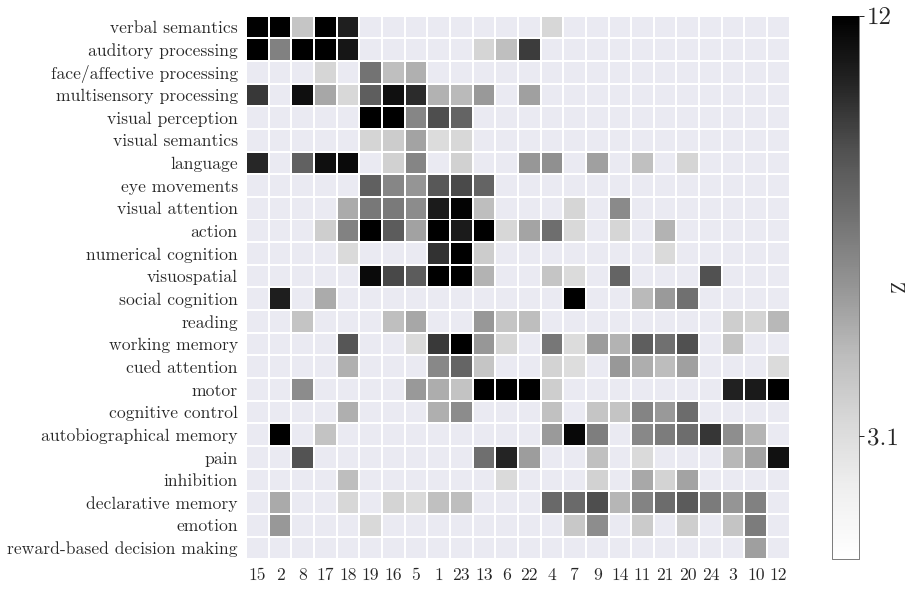

In [16]:
import matplotlib.font_manager as fm
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'
# Register the font
custom_font = fm.FontProperties(fname=font_path)
# Set font to custom_font
plt.rcParams['font.family'] = custom_font.get_name()
plt.rcParams['font.size'] = 20  # Change the number to the size you want

# your other code...

f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df_ordered.reindex(df_ordered.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('Z', rotation=270)  # Increase labelpad if necessary
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.ax.tick_params(labelsize=25)  # You can change 15 to the size you want
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')


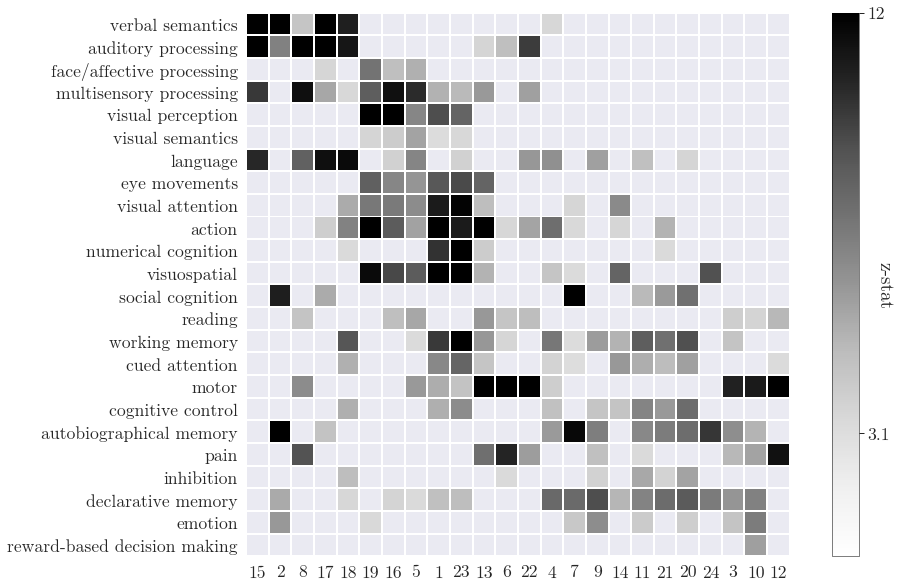

In [59]:
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the font path to your custom font
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'

# Register the font
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# Set the font size
plt.rcParams['font.size'] = 14

# Your existing code
decoder = decode.Decoder(dataset, method='roi')
thr = 3.1
vmin = 5
vmax = 12
tot = 5
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/apc_post_fuckup/grp_avgs_download/outputting_regions/final/resamp-outputting_regions_cluster-%02d.nii.gz' % (i)) for i in range(1, 25)], save='/Users/gcooper/Desktop/Delay_attempt_9000/apc_post_fuckup/grp_avgs_download/outputting_regions/final/outputting_regions_clusters_decoding_results.txt')
df = data.copy()
df.columns = range(1, 25)
df[df < thr] = 0
groupings_order = [15, 2, 8, 17, 18, 19, 16, 5, 1, 23, 13, 6, 22, 4, 7, 9, 14, 11, 21, 20, 24, 3, 10, 12]
df_ordered = pd.DataFrame()
for i in groupings_order:
    df_ordered[i] = df[i]
df[df < thr] = 0
heatmapOrder = getOrder(np.array(df_ordered), thr)
f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
plotData = df_ordered.reindex(df_ordered.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr, vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()


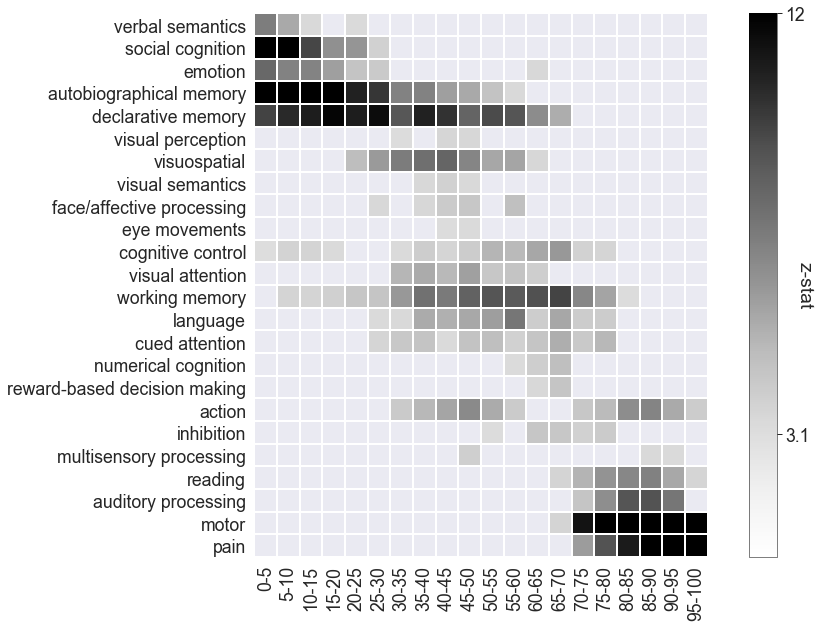

In [41]:
# Gradient 1 inputs

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_x/resamp_PCA_x_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_x/PCA_x_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

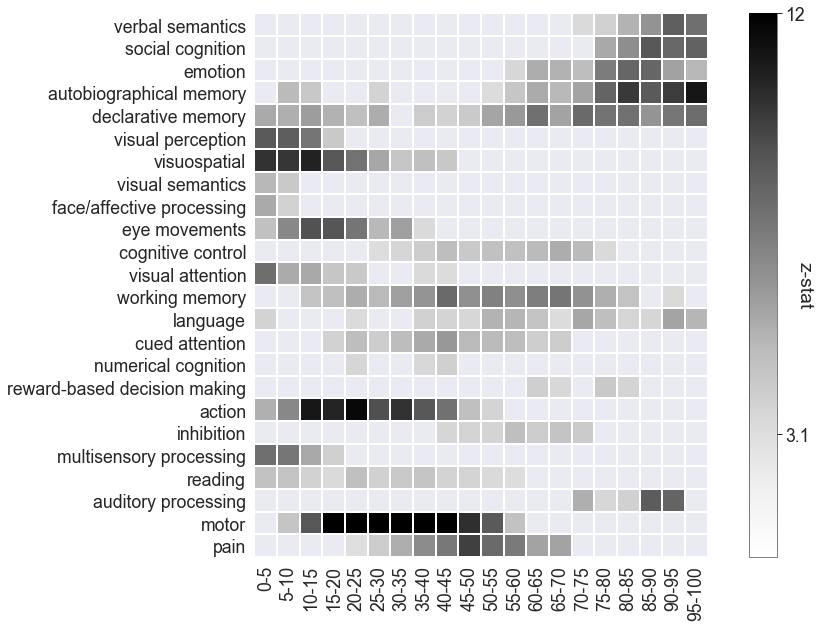

In [35]:
# Gradient 2 inputs

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_y/resamp_PCA_y_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_y/PCA_y_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
#heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

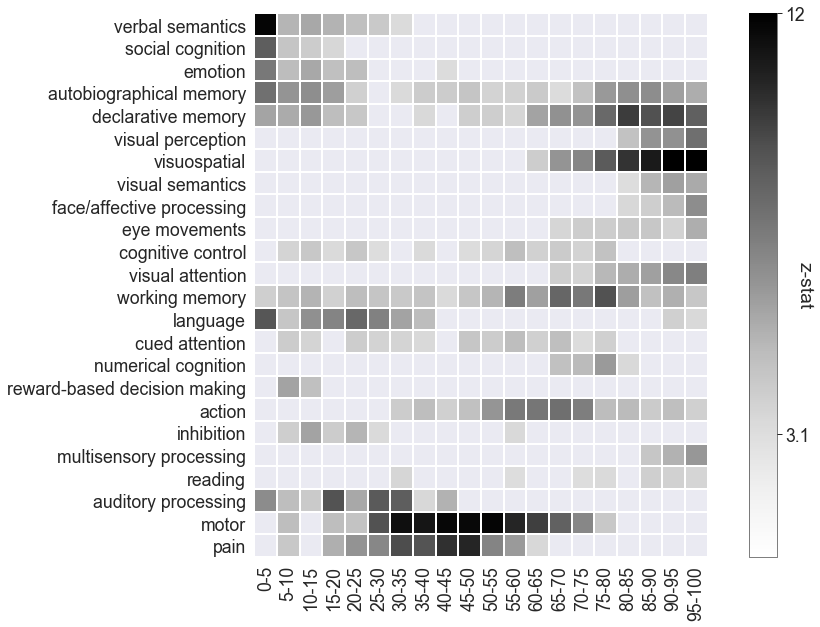

In [36]:
# Gradient 3 inputs 

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_z/resamp_PCA_z_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/INPUTS/dimensions/means/thr_z/PCA_z_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
#heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

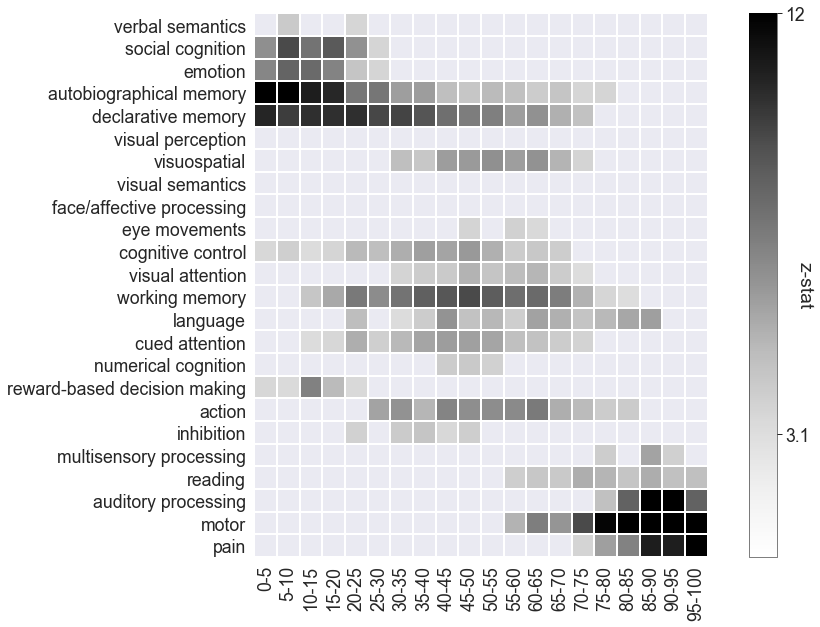

In [40]:
# Gradient 1 outputs

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_x/resamp_PCA_x_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_x/PCA_x_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
#heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')



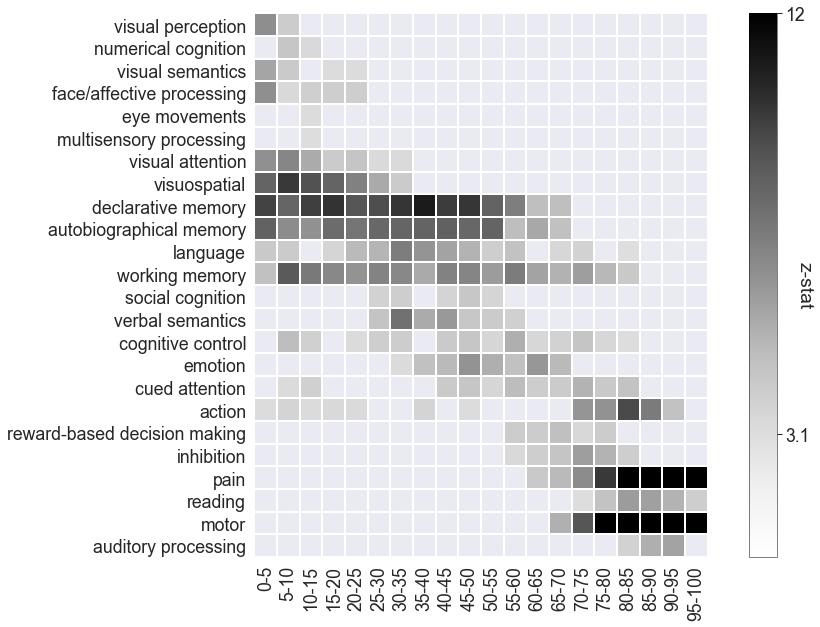

In [44]:
# Gradient 2 outputs

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_y/resamp_PCA_y_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_y/PCA_y_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

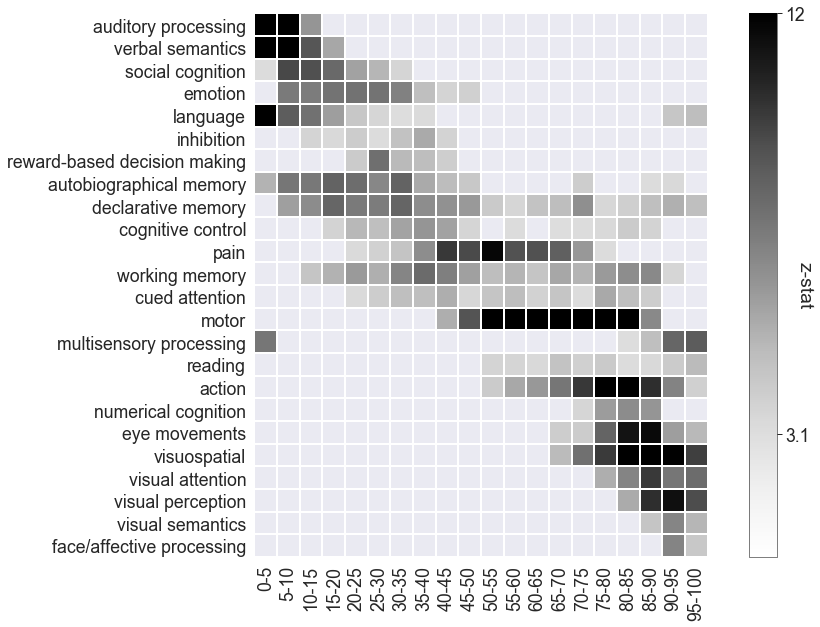

In [47]:
# Gradient 3 outputs

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
#data = decoder.decode([str('my_masks/56subjs_SDI_%02d.nii' % (i)) 
#                       for i in xrange(1,21)],save='decoding_results_SDI_56subjs_.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in xrange(0,100/tot)], save='decoding_results_Margulies.txt')
data = decoder.decode([str('/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_z/resamp_PCA_z_thr-%02d-%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                       for i in xrange(0,100/tot)], save='/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/OUTPUTS/dimensions/means/thr_z/PCA_z_thr-decoding_results.txt')

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr, vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
#f.savefig('fig_56subjs_ratioLA_0-5_15.neurosynth.svg', format='svg')

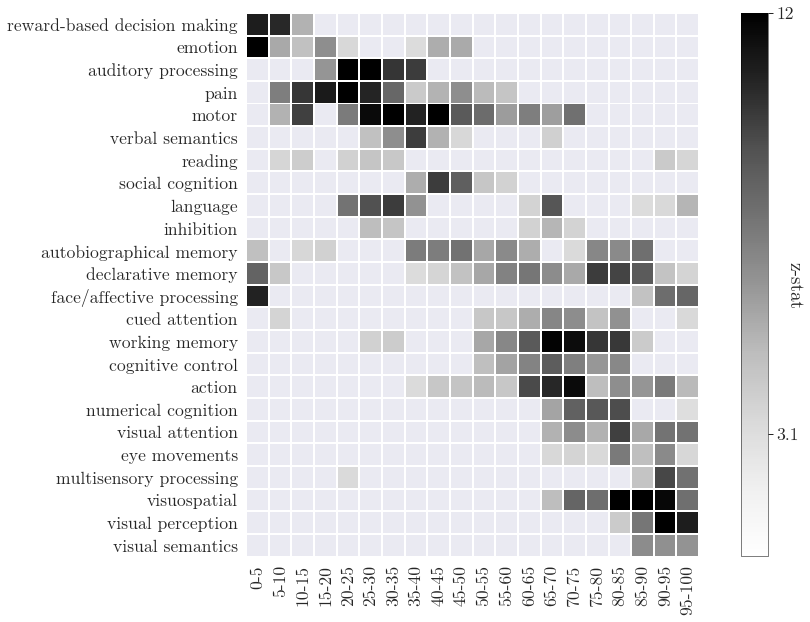

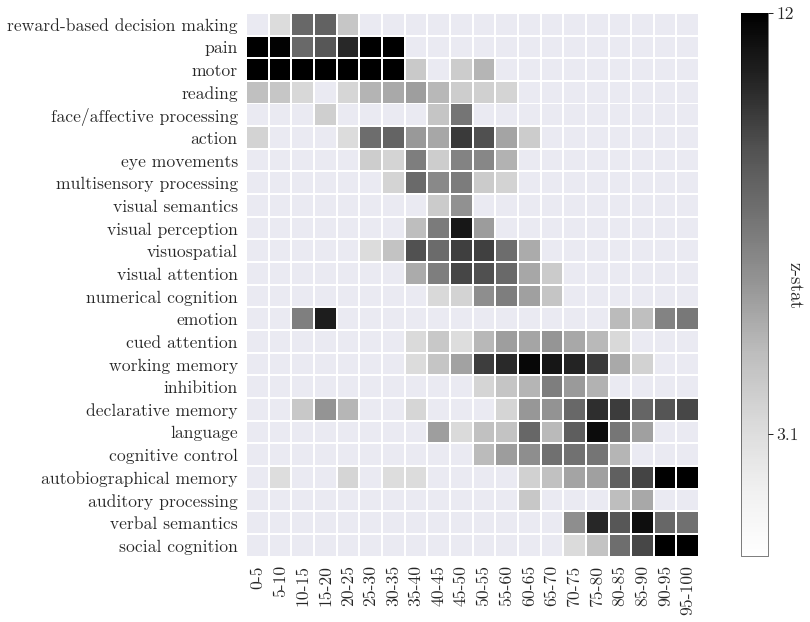

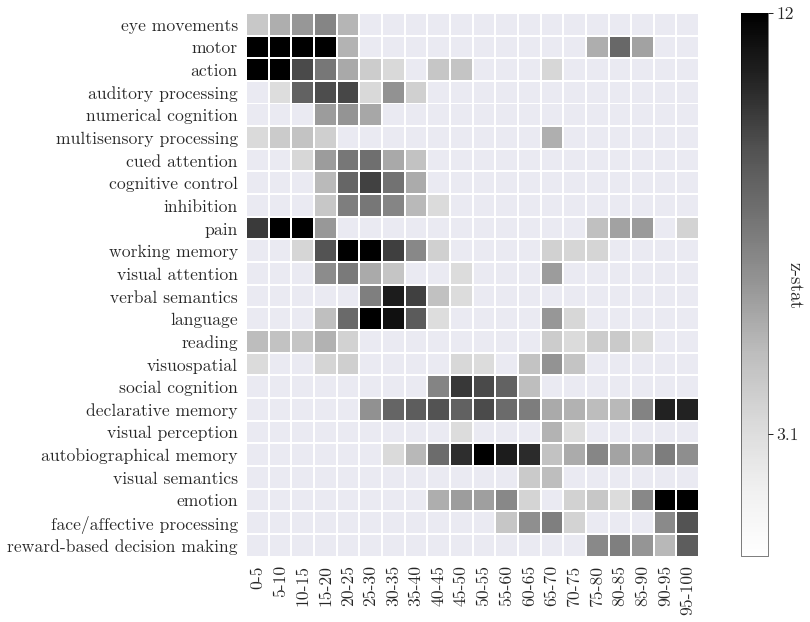

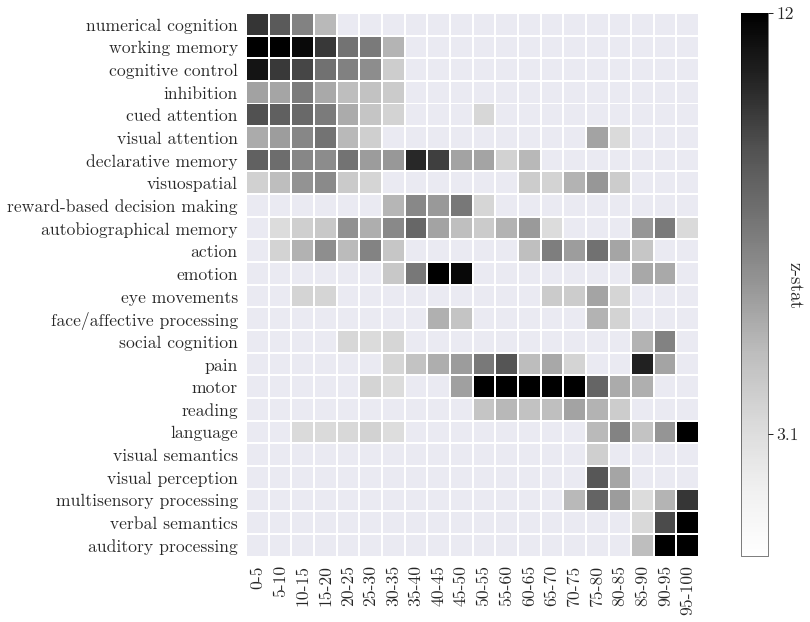

In [23]:
# Gradient INPUTS
import matplotlib.font_manager as fm

# Set the font path to your custom font
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'

# Register the font
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# Set the font size
plt.rcParams['font.size'] = 14


decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5

folders = ['x', 'y', 'z', 'a']
base_folder = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_'

for folder in folders:
    input_folder = base_folder + folder
    output_filename = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_{}/PCA_{}_thr-decoding_results.txt'.format(folder, folder)
    
    data = decoder.decode([str(input_folder + '/resamp_PCA_%s_thr-%02d-%02d.nii.gz' % (folder, i * tot, (i * tot) + tot)) 
                           for i in xrange(0,100/tot)], save=output_filename)

    df = []
    df = data.copy()
    newnames = []
    [newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
    df.columns = newnames
    df[df<thr] = 0 
    heatmapOrder = getOrder(np.array(df), thr)

    #sns.set(context="paper", font="sans-serif", font_scale=2)
    f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
    plotData = df.reindex(df.index[heatmapOrder])
    cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
                ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
    #sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
    cbar = cax.collections[0].colorbar
    cbar.set_label('z-stat', rotation=270)
    cbar.set_ticks(ticks=[thr,vmax])
    cbar.set_ticklabels(ticklabels=[thr, vmax])
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(0.5)

    plt.draw()
#    f.savefig('fig_{}_ratioLA_0-5_15.neurosynth.svg'.format(folder), format='svg')

x
y
z
a
b


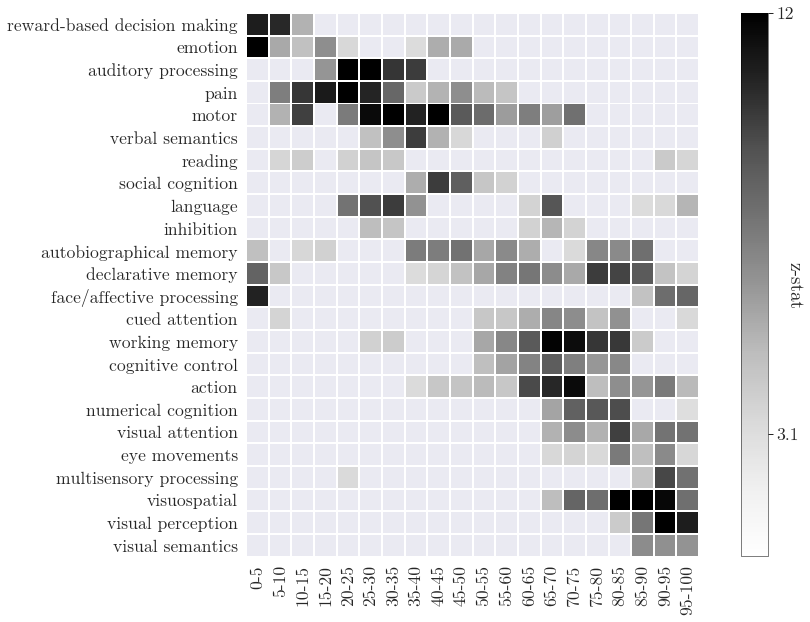

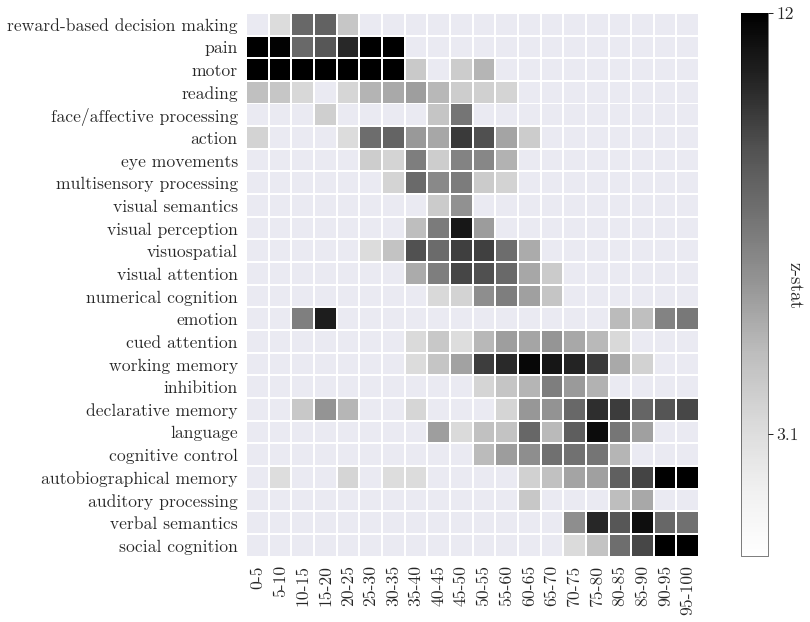

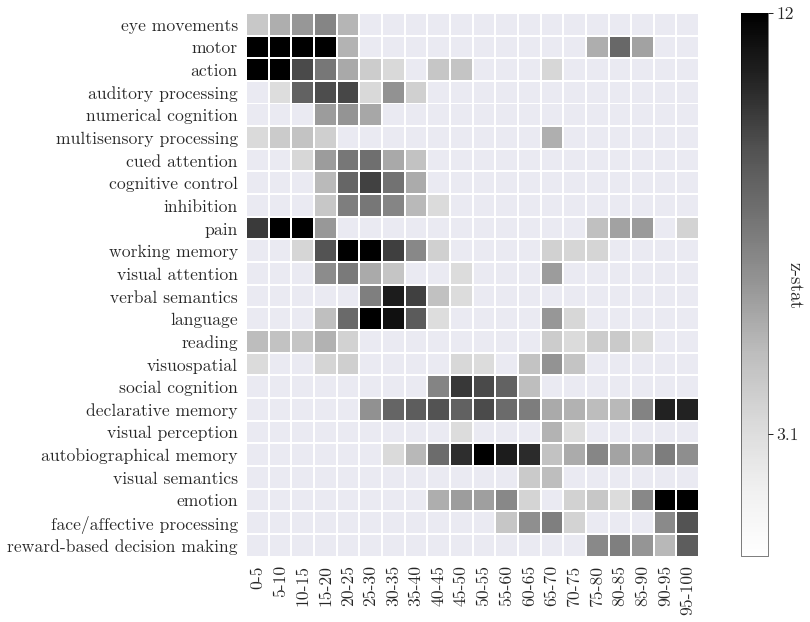

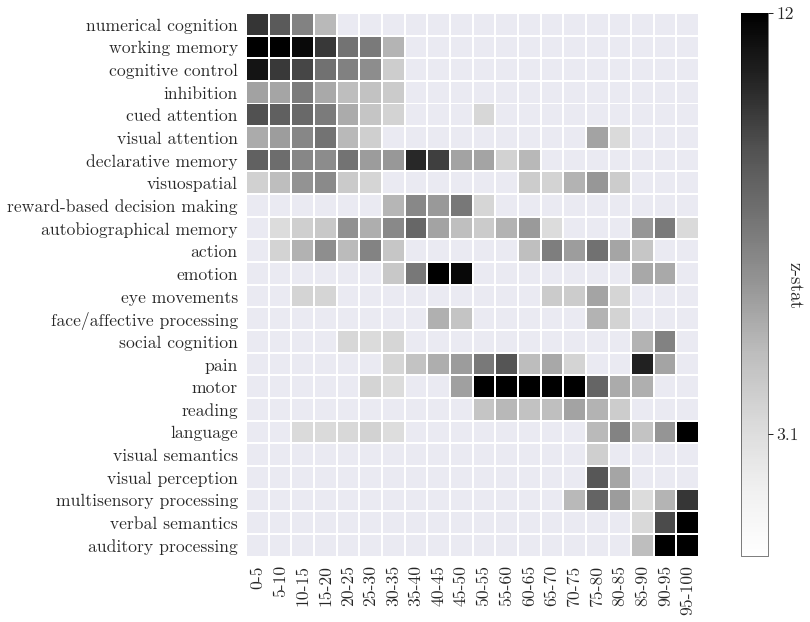

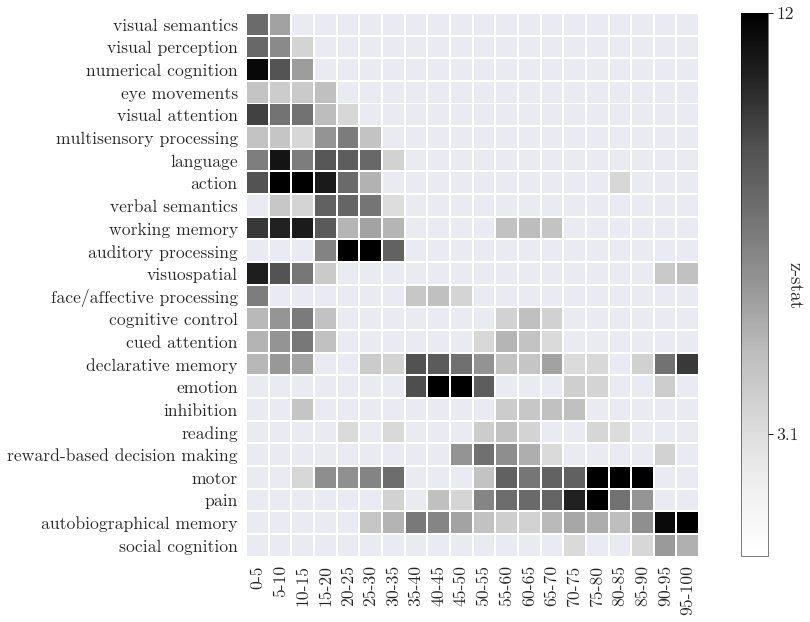

In [28]:
# Gradient INPUTS
import matplotlib.font_manager as fm
from neurosynth.analysis import decode
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set the font path to your custom font
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'

# Register the font
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# Set the font size
plt.rcParams['font.size'] = 14

# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5

folders = ['x', 'y', 'z', 'a', 'b']
base_folder = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_'

for folder in folders:
    input_folder = base_folder + folder
    output_filename = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_{}/PCA_{}_thr-decoding_results.txt'.format(folder, folder)
    
    data = decoder.decode([str(input_folder + '/resamp_PCA_%s_thr-%02d-%02d.nii.gz' % (folder, i * tot, (i * tot) + tot)) 
                           for i in xrange(0,100/tot)], save=output_filename)

    df = []
    df = data.copy()
    newnames = []
    [newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
    df.columns = newnames
    df[df<thr] = 0 
    heatmapOrder = getOrder(np.array(df), thr)

    # Here, instead of "sans-serif", use your custom font's name
    sns.set(context="paper", font=custom_font.get_name(), font_scale=2)
    
    f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
    plotData = df.reindex(df.index[heatmapOrder])
    cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
                ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
    
    cbar = cax.collections[0].colorbar
    cbar.set_label('z-stat', rotation=270)
    cbar.set_ticks(ticks=[thr,vmax])
    cbar.set_ticklabels(ticklabels=[thr, vmax])
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(0.5)
    print(folder)
    plt.draw()
#    plt.savefig('fig_{}_ratioLA_0-5_15.neurosynth.svg'.format(folder), format='svg', transparent=True)


x
y
z
a
b


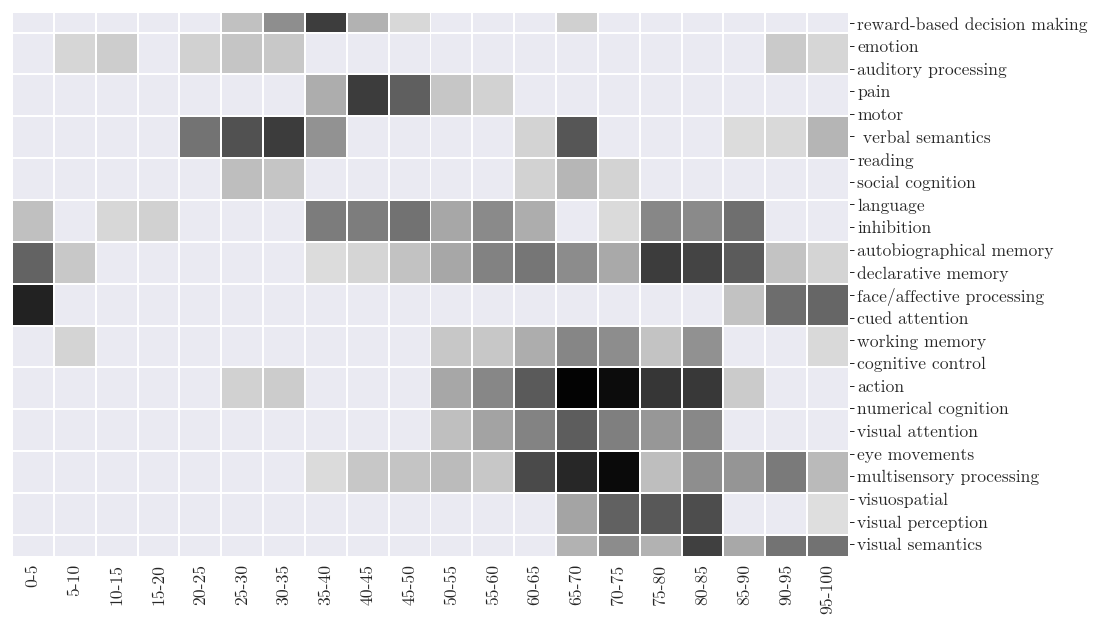

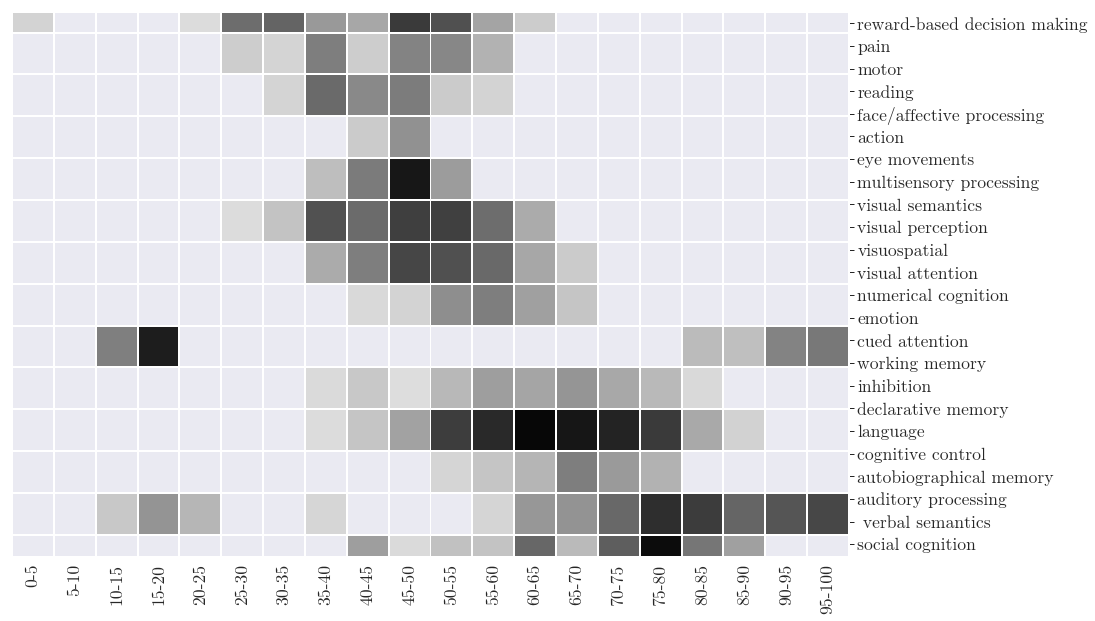

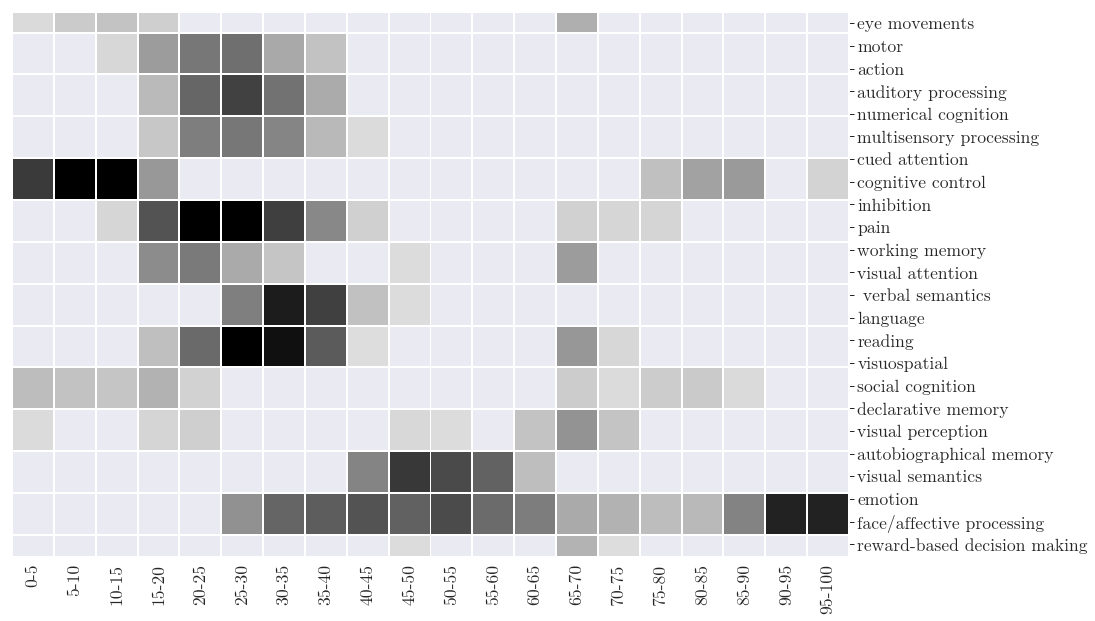

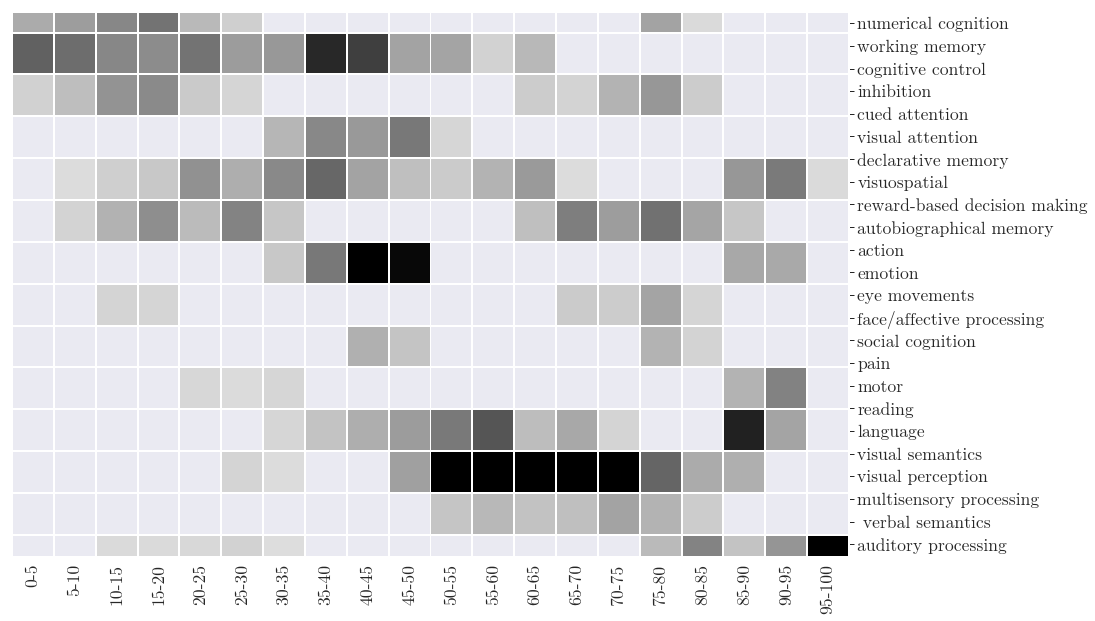

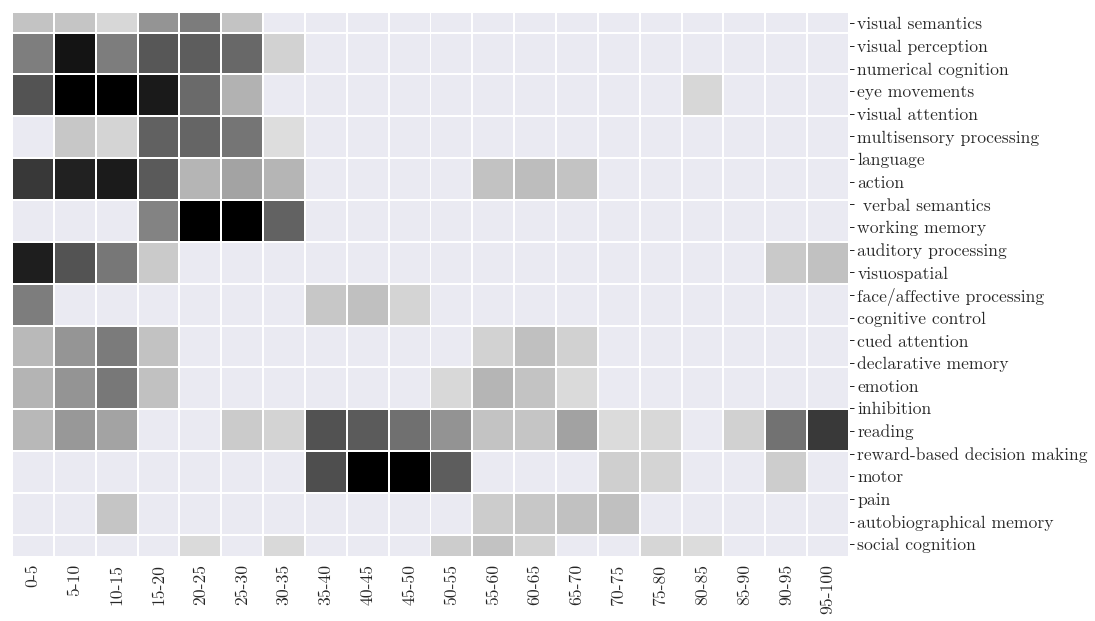

In [28]:
# Gradient INPUTS
import matplotlib.font_manager as fm
from neurosynth.analysis import decode
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set the font path to your custom font
font_path = '/Users/gcooper/Downloads/Latin-Modern-Roman/lmroman10-regular.otf'

# Register the font
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# Set the font size
plt.rcParams['font.size'] = 14

# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5

folders = ['x', 'y', 'z', 'a', 'b']
base_folder = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_'

for folder in folders:
    input_folder = base_folder + folder
    output_filename = '/Users/gcooper/Desktop/Delay_attempt_9000/pca/diffusion/COEFS_FINAL/INPUTS/dimensions/means/thr_{}/PCA_{}_thr-decoding_results.txt'.format(folder, folder)
    
    data = decoder.decode([str(input_folder + '/resamp_PCA_%s_thr-%02d-%02d.nii.gz' % (folder, i * tot, (i * tot) + tot)) 
                           for i in xrange(0,100/tot)], save=output_filename)

    df = []
    df = data.copy()
    newnames = []
    [newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
    df.columns = newnames
    df[df<thr] = 0 
    heatmapOrder = getOrder(np.array(df), thr)

    # Here, instead of "sans-serif", use your custom font's name
    sns.set(context="paper", font=custom_font.get_name(), font_scale=2)
    
    f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
    plotData = df.reindex(df.index[heatmapOrder])

    # Create the seaborn heatmap without colorbar
    # ... your previous code ...

    # Create the seaborn heatmap without colorbar
    # ... your previous code ...

    # Create the seaborn heatmap without colorbar
    cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
                      ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0, cbar=False)

    # Create a twin y-axis
    ax2 = ax1.twinx()

    # Copy y-axis limits and labels from original y-axis to the twin y-axis
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(ax1.get_yticks())
    ax2.set_yticklabels([item.get_text() for item in ax1.get_yticklabels()])

    # Make twinned axis transparent
    ax2.patch.set_visible(False)

    # Turn off grid on the twin y-axis
    ax2.grid(False)

    # Hide the original y-axis
    ax1.yaxis.set_visible(False)

    print(folder)
    plt.draw()
    # plt.savefig('fig_{}_ratioLA_0-5_15.neurosynth.svg'.format(folder), format='svg', transparent=True)




